In [26]:
from vtl.Readfile import Readfile
from spec_id import Scale_model, Single_gal_fit_full_2d
import grizli
import sympy as sp
from astropy.io import fits
from astropy.cosmology import Planck13 as cosmo
from astropy.table import Table
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage import interpolation
from astropy import wcs
import pysynphot as S
import matplotlib.pyplot as plt
from matplotlib import gridspec
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [20]:
def Oldest_galaxy(z):
    return cosmo.age(z).value

In [59]:
fp = '/Users/Vince.ec/Clear_data/flt_files/'
# fp = '/Users/vestrada/Clear_data/flt_files/'


flt_list=glob(fp + 'ic*flt.fits')

specflt=[]
photflt=[]
for i in range(len(flt_list)):
    indat=fits.open(flt_list[i])
    if indat[0].header['OBSTYPE'] ==  'SPECTROSCOPIC':
        specflt.append(flt_list[i])
    if indat[0].header['OBSTYPE'] ==  'IMAGING':
        photflt.append(flt_list[i])

In [60]:
def Source_present(fn,ra,dec):
    flt=fits.open(fn)
    w = wcs.WCS(flt[1].header)
    present=False

    xpixlim=len(flt[1].data[0])
    ypixlim=len(flt[1].data)

    [pos]=w.wcs_world2pix([[ra,dec]],1)



    if -100<pos[0]<xpixlim + 100 and -100<pos[1]<ypixlim + 100:
        present=True

    return present,pos


In [61]:
pres = np.repeat('False',len(specflt))
pos = np.zeros([len(specflt),2])

p_pres = np.repeat('False',len(photflt))
p_pos = np.zeros([len(photflt),2])

for i in range(len(specflt)):
    pres[i],pos[i] = Source_present(specflt[i], 53.041826, -27.725868)
    
for i in range(len(photflt)):
    p_pres[i],p_pos[i] = Source_present(photflt[i], 53.041826, -27.725868)

In [62]:
g_speclist = []
g_pos = []

g_speclist_p = []
g_pos_p = []

for i in range(len(pres)):
    if pres[i] == 'True':
        g_speclist.append(specflt[i])
        g_pos.append(pos[i])
        
for i in range(len(p_pres)):
    if p_pres[i] == 'True':
        g_speclist_p.append(photflt[i])
        g_pos_p.append(p_pos[i])

In [6]:
dat = fits.open(g_speclist_p[0])

In [7]:
g_speclist

['/Users/vestrada/Clear_data/flt_files/icxt19o6q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt19o7q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt19oaq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt19ocq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20f7q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20f8q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20fbq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20fdq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21b7q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21b8q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21bcq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21beq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22pmq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22pnq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22pqq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22psq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/i

In [8]:
g_speclist_p

['/Users/vestrada/Clear_data/flt_files/icxt19o9q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt19odq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20faq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20feq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21baq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21bfq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22ppq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22ptq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt23pyq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt23q2q_flt.fits']

In [6]:
flt = grizli.model.GrismFLT(grism_file='../../../Clear_data/flt_files/icxt23pwq_flt.fits', 
                            direct_file='../../../Clear_data/flt_files/icxt23pyq_flt.fits',
                            pad=200, ref_file=None, ref_ext=0, 
                            seg_file='../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits',
                            shrink_segimage=False)

The following tasks in the stwcs.gui package can be run with TEAL:
     apply_headerlet          archive_headerlet          attach_headerlet     
     delete_headerlet         extract_headerlet         headerlet_summary     
    restore_headerlet             updatewcs              write_headerlet


../../../Clear_data/flt_files/icxt23pyq_flt.fits / blot segmentation ../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits[0]
The following task in the fitsblender package can be run with TEAL:
                                  blendheaders                                  
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastro

In [7]:
ref_cat = Table.read('../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat', format='ascii')
sim_cat = flt.blot_catalog(ref_cat, sextractor=False)

In [28]:
ref_cat

id,x,y,ra,dec,faper_F160W,eaper_F160W,faper_F140W,eaper_F140W,f_F160W,e_F160W,w_F160W,f_U50,e_U50,w_U50,f_U38,e_U38,w_U38,f_U,e_U,w_U,f_F435W,e_F435W,w_F435W,f_B,e_B,w_B,f_V,e_V,w_V,f_F606Wcand,e_F606Wcand,w_F606Wcand,f_F606W,e_F606W,w_F606W,f_R,e_R,w_R,f_Rc,e_Rc,w_Rc,f_F775W,e_F775W,w_F775W,f_I,e_I,w_I,f_F814Wcand,e_F814Wcand,w_F814Wcand,f_F850LP,e_F850LP,w_F850LP,f_F850LPcand,e_F850LPcand,w_F850LPcand,f_F098M,e_F098M,w_F098M,f_F105W,e_F105W,w_F105W,f_F125W,e_F125W,w_F125W,f_J,e_J,w_J,f_tenisJ,e_tenisJ,w_tenisJ,f_F140W,e_F140W,w_F140W,f_H,e_H,w_H,f_tenisK,e_tenisK,w_tenisK,f_Ks,e_Ks,w_Ks,f_IRAC1,e_IRAC1,w_IRAC1,f_IRAC2,e_IRAC2,w_IRAC2,f_IRAC3,e_IRAC3,w_IRAC3,f_IRAC4,e_IRAC4,w_IRAC4,f_IA427,e_IA427,f_IA445,e_IA445,f_IA464,e_IA464,f_IA484,e_IA484,f_IA505,e_IA505,f_IA527,e_IA527,f_IA550,e_IA550,f_IA574,e_IA574,f_IA598,e_IA598,f_IA624,e_IA624,f_IA651,e_IA651,f_IA679,e_IA679,f_IA709,e_IA709,f_IA738,e_IA738,f_IA767,e_IA767,f_IA797,e_IA797,f_IA827,e_IA827,f_IA856,e_IA856,tot_cor,wmin_ground,wmin_hst,wmin_wfc3,wmin_irac,z_spec,star_flag,kron_radius,a_image,b_image,theta_J2000,class_star,flux_radius,fwhm_image,flags,IRAC1_contam,IRAC2_contam,IRAC3_contam,IRAC4_contam,contam_flag,f140w_flag,use
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64
1,11876.639,1632.89,53.093012,-27.954546,55.142755,0.04619,-99.0,-99.0,152.454867,0.566142,0.145168,1.352361,0.127182,0.788209,0.805553,0.263519,0.578443,0.985569,0.031231,0.568663,1.746244,0.047086,0.931406,4.074255,0.036473,0.877103,6.980364,0.05618,0.830698,-99.0,-99.0,0.0,9.847546,0.053404,0.472683,-99.0,-99.0,0.0,18.513824,0.106413,0.740997,29.45124,0.085954,0.489023,46.500668,0.453126,0.790262,32.139836,0.062493,0.25503,46.975004,0.115863,0.490393,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,99.647068,0.246585,0.175025,-99.0,-99.0,0.0,100.748562,0.388369,0.774747,-99.0,-99.0,0.0,-99.0,-99.0,0.0,224.042977,0.51909,0.82136,-99.0,-99.0,0.0,192.27164,0.71422,0.236504,146.10977,0.532723,0.324725,120.350358,1.663092,0.41767,78.633913,1.460898,0.586788,2.469474,0.194061,4.788713,0.188734,5.113387,0.309454,4.705549,0.072503,5.703637,0.14496,6.005367,0.121333,8.385538,0.164845,8.884367,0.174721,10.675616,0.059347,15.427764,0.064332,17.741366,0.050566,22.014039,0.097384,34.505472,0.24272,29.671548,0.131482,33.031287,0.218194,35.640783,0.257058,45.336353,0.501581,48.835861,0.487295,1.0,0.568663,0.145168,0.145168,0.236504,-1.0,0,3.5,19.172,6.584,-74.9,0.03,9.694,7.01,0,9.5e-05,3.1e-05,0.000187,0.001174,0,0,-1
2,12056.715,1321.055,53.089613,-27.959742,0.530063,0.077372,-99.0,-99.0,0.638394,0.093185,0.051736,1.056095,0.133273,0.777241,1.49812,0.195751,0.620188,0.242905,0.020931,0.556419,0.068595,0.035116,0.317779,2.660439,0.032948,0.908255,2.543611,0.044183,0.785269,-99.0,-99.0,0.0,-99.0,-99.0,0.0,-99.0,-99.0,0.0,2.956926,0.093907,0.762935,-99.0,-99.0,0.

(200, 1214)

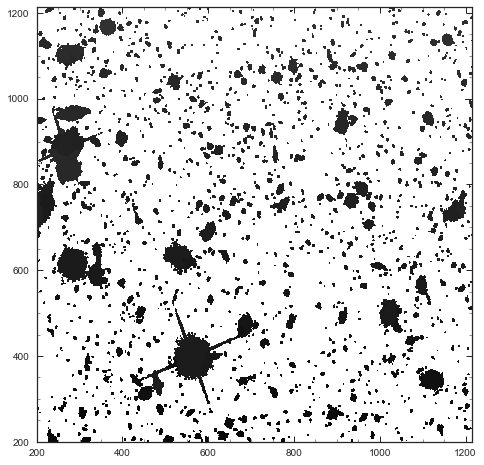

In [8]:
%matplotlib inline
# print('Number of objects in `photutils` catalog: %d' %(len(flt.catalog)))
plt.figure(figsize=[8,8])
plt.imshow(flt.seg, cmap='gray_r', origin='lower')
plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)

In [134]:
g_pos_p

[array([ -28.6447641 ,  758.02073521]),
 array([ -42.1892098 ,  761.00556783]),
 array([ -76.99219032,  488.37041682]),
 array([ -90.4725554 ,  491.54600567]),
 array([ -76.90766262,  488.39628668]),
 array([ -90.44107418,  491.52817958]),
 array([  68.96229513,  905.34199648]),
 array([  55.52069747,  908.46460959]),
 array([  68.94325052,  905.42603211]),
 array([  55.4422293 ,  908.48483191])]

In [9]:
# Find the object near detector (x,y) = (712, 52) 
xi, yi = 68+flt.pad, 905+flt.pad # nice line

# dr = np.sqrt((flt.catalog['x_flt']-xi)**2+(flt.catalog['y_flt']-yi)**2)
# ix = np.argmin(dr)
# id = flt.catalog['id'][ix]
id = 39170
# mag = flt.catalog['mag'][ix]
x0 = ref_cat['x'][39169]+1
y0 = ref_cat['y'][39169]+1
# print('   id=%d, (x,y)=(%.1f, %.1f), mag=%.2f' %(id, x0, y0, mag))

## Get properties of the object from the segmentation region alone
## regardless of whether you have the detection catalog
# out = grizli.utils_c.disperse.compute_segmentation_limits(flt.seg, id,
#                                                           flt.direct.data['SCI'],
#                                                           flt.direct.sh)
# ymin, ymax, yseg, xmin, xmax, xseg, area, segm_flux = out
# print('Segment: (x,y)=(%.1f, %.1f) # zero index' %(xseg, yseg))

In [10]:
# x pixels from the center of the direct image
dx = np.arange(220)
# ytrace and wavelength at x=dx
dy, lam = flt.conf.get_beam_trace(x=x0, y=y0, dx=dx, beam='A')

These should be the same: 125.696 125.696


(200, 1214)

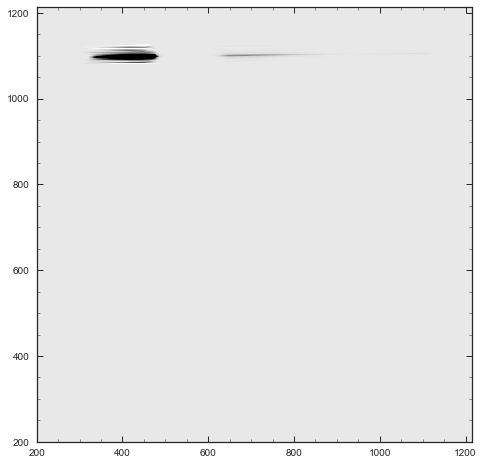

In [11]:
import collections
import time
%matplotlib inline
### Make sure these are initialized
flt.object_dispersers = collections.OrderedDict()
flt.model *= 0

### Compute model of a single object and catch the output, mag=-1 will force compute all orders
single_model = flt.compute_model_orders(id=id, compute_size=True, mag=-1, in_place=False)

### The other option is to store the model "in place" in the `flt.model` attribute.
status = flt.compute_model_orders(id=id, compute_size=True, mag=-1, in_place=True)
print('These should be the same: %.3f %.3f' %(single_model[1].sum(), flt.model.sum()))

## Show it
plt.figure(figsize=[8,8])
plt.imshow(single_model[1]*10, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

# plt.scatter(xseg, yseg, marker='o', color='r') # position in direct image

plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)

In [11]:
## Only fit objects brighter than 26th mag (AB)
mag =-2.5*np.log10(ref_cat['f_F850LP']) + 25
keep = mag < 22
print mag[39169]
## Reset
flt.object_dispersers = collections.OrderedDict()
flt.model *= 0

## Helper function that loops over `self.compute_model_orders` for many objects
## Result is stored in the `self.model` attribute.
flt.compute_full_model(ids=ref_cat['id'][keep], 
                       mags=mag[keep])


21.2327639062
ID 1 not found in segmentation image
ID 68 not found in segmentation image
ID 102 not found in segmentation image
ID 104 not found in segmentation image
ID 160 not found in segmentation image
ID 194 not found in segmentation image
ID 234 not found in segmentation image
ID 236 not found in segmentation image
ID 330 not found in segmentation image
ID 340 not found in segmentation image
ID 357 not found in segmentation image
ID 405 not found in segmentation image
ID 450 not found in segmentation image
ID 456 not found in segmentation image
ID 490 not found in segmentation image
ID 543 not found in segmentation image
ID 599 not found in segmentation image
ID 601 not found in segmentation image
ID 647 not found in segmentation image
ID 721 not found in segmentation image
ID 756 not found in segmentation image
ID 871 not found in segmentation image
ID 917 not found in segmentation image
ID 983 not found in segmentation image
ID 1019 not found in segmentation image
ID 1134 not f

(200, 1214)

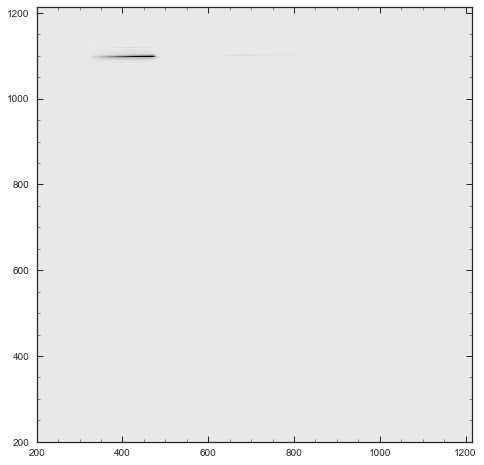

In [12]:
plt.figure(figsize=[8,8])
plt.imshow(flt.model, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')
plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)

(200, 1214)

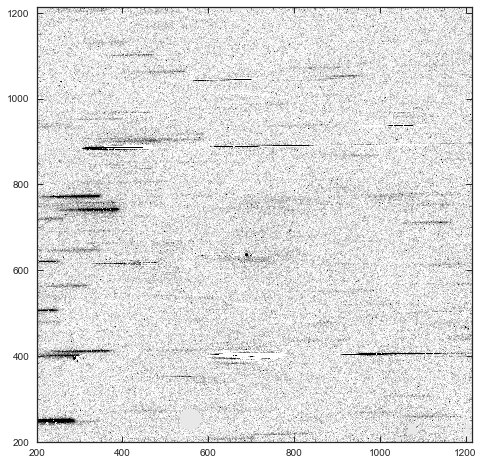

In [13]:

# residual
plt.figure(figsize=[8,8])

plt.imshow(flt.grism.data['SCI'] - flt.model, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')
plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)
# Note, some spectra on the left side of the image aren't modeled because they fall off of 
# the direct image.  This can be accounted for when using reference mosaics that cover areas 
# larger than the FLT frames themselves.

# Also, this is just a crude model with simple (wrong) assumptions about the shapes of the object spectra!

('Spectral orders: ', OrderedDict([('A', <grizli.model.GrismDisperser object at 0x12744e2d0>), ('B', <grizli.model.GrismDisperser object at 0x12744e290>), ('C', <grizli.model.GrismDisperser object at 0x12744e450>), ('D', <grizli.model.GrismDisperser object at 0x1243f8c50>), ('E', <grizli.model.GrismDisperser object at 0x1243f8a50>)]))
(64, 124)
(64, 271)


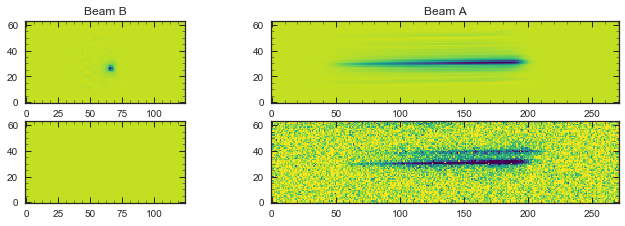

In [13]:

### Re-run again to make sure beams are stored, in case didn't run the full loop as above
if id not in flt.object_dispersers:
    flt.compute_model_orders(id=id, compute_size=True, mag=-1, store=True)

### Get the beams/orders
beams = flt.object_dispersers[id]
print('Spectral orders: ', beams)

### Make a figure showing the model (top) and observed (bottom) spectra
### for the first and zeroth orders.
fig = plt.figure(figsize=[10,3])
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,3.4],
                       height_ratios=[1,1])

for i, b in enumerate(['B','A']):
    beam = beams[b]
    print(beam.sh_beam)
    
    model = beam.compute_model(id=id, spectrum_1d=beam.spectrum_1d, in_place=False)
    vmax = model.max()
    
    #ax = fig.add_subplot(221+i)
    ax = fig.add_subplot(gs[0,i])
    ax.imshow(model.reshape(beam.sh_beam), interpolation='Nearest', origin='lower', cmap='viridis_r', 
              vmin=-0.1*vmax, vmax=vmax)
    
    ax.set_title('Beam %s' %(b))
    
    ### Cutout of observed data
    sci_cutout = beam.cutout_from_full_image(flt.grism.data['SCI'])
    ax = fig.add_subplot(gs[1,i]) #fig.add_subplot(223+i)
    ax.imshow(sci_cutout, interpolation='Nearest', origin='lower', cmap='viridis_r', 
              vmin=-0.1*vmax, vmax=vmax)

fig.tight_layout(pad=0.1)

Available computed beams/orders for id=39170: ['A', 'B', 'C', 'D', 'E']

`beam` class: <class 'grizli.model.GrismDisperser'>

`co` class: <class 'grizli.model.BeamCutout'>

Object 39170, total flux density within the segmentation region: 4.540e-18 erg/s/cm2/A


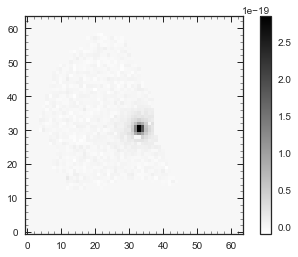

In [14]:
reload(grizli.model)
print('Available computed beams/orders for id=%d: %s\n' %(id, flt.object_dispersers[id].keys()))
beam = flt.object_dispersers[id]['A'] # can choose other orders if available
beam.compute_model()
print('`beam` class: %s\n' %(beam.__class__))

### BeamCutout object
co = grizli.model.BeamCutout(flt, beam, conf=flt.conf)
print('`co` class: %s\n' %(co.__class__))

print('Object %d, ' %(co.id) +
      'total flux density within the segmentation region: %.3e erg/s/cm2/A'%(co.beam.total_flux))
    
### Show the direct image
plt.imshow(co.beam.direct*(co.beam.seg == id), interpolation='Nearest', cmap='gray_r', origin='lower')
plt.colorbar()

In [41]:
### Can write the BeamCutout object to a normal FITS file
co.write_fits(root='galaxy', clobber=True)

'galaxy_39170.g102.A.fits'

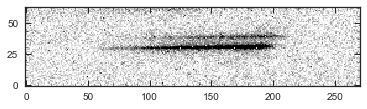

In [15]:
# Show the spectrum cutout
%matplotlib inline
plt.imshow(co.grism.data['SCI'], interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

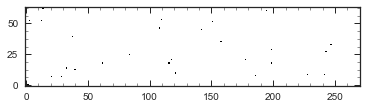

In [17]:
plt.imshow(co.grism.data['ERR'], interpolation='Nearest',  
           cmap='gray_r', origin='lower')

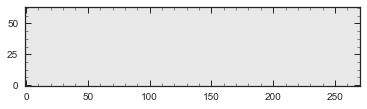

In [21]:
# Show the contamination model, which was cutout of `flt.model`
plt.imshow(co.contam, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

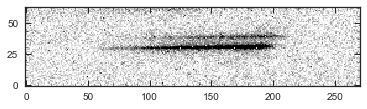

In [17]:
plt.imshow(co.grism.data['SCI']-co.contam, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

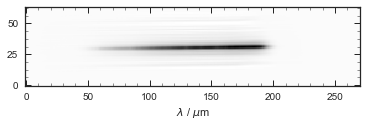

In [18]:
##### quick demo of a cartoon "break" spectrum showing how compute_model works
wv,fl = np.load('../../../fsps_models_for_fit/fsps_spec/m0.02_a3.0_dt8.48_spec.npy')
spec = S.ArraySpectrum(wv, fl, fluxunits='flam')
spec = spec.redshift(1.023).renorm(1., 'flam', S.ObsBandpass('wfc3,ir,f105w'))
# spec.convert('flam')
model = co.beam.compute_model(spectrum_1d=[spec.wave , spec.flux], in_place=False)

## Plot it
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(model.reshape(co.beam.sh_beam), interpolation='Nearest', 
           cmap='gray_r', origin='lower')

## Helper functions for 2D plot axes
# co.beam.twod_axis_labels(limits=[1.0, 1.81, 0.1], wscale=1.e4, mpl_axis=ax)
# co.beam.twod_xlim(1.05, 1.75, wscale=1.e4, mpl_axis=ax)
ax.set_xlabel(r'$\lambda$ / $\mu$m')

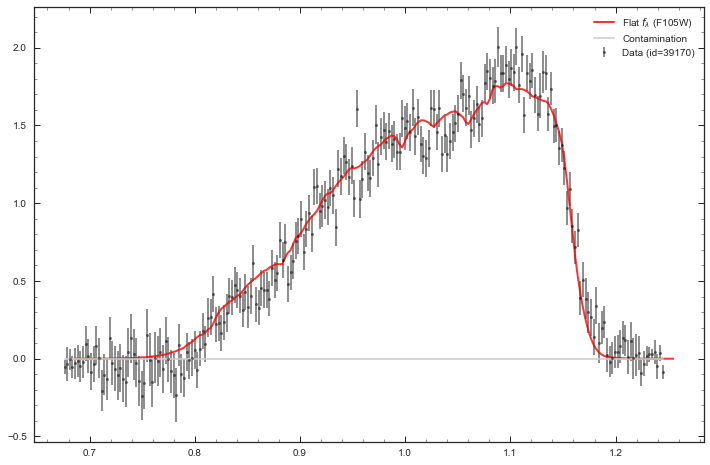

In [19]:
# 1D optimal extraction (Horne 1986)
cmodel = co.beam.compute_model(spectrum_1d=[spec.wave, spec.flux],in_place=False).reshape(co.beam.sh_beam)

xspec, yspec, yerr = co.beam.optimal_extract(co.grism.data['SCI'], bin=0, ivar=co.ivar) #data
xspecm, yspecm, yerrm = co.beam.optimal_extract(cmodel, bin=0, ivar=co.ivar) # continuum model
xspecc, yspecc, yerrc = co.beam.optimal_extract(co.contam, bin=0, ivar=co.ivar) # contamination model
C = Scale_model(yspec[yspec > 0]-yspecc[yspec > 0],yerr[yspec > 0],yspecm[yspec > 0])

plt.figure(figsize=[12,8])
plt.errorbar(xspec/1.e4, yspec-yspecc, yerr, linestyle='None', marker='o', markersize=3, color='black', 
             alpha=0.5, label='Data (id=%d)' %(co.beam.id))

plt.plot(xspecm/1.e4 + .01, yspecm*C, color='red', linewidth=2, alpha=0.8, 
         label=r'Flat $f_\lambda$ (%s)' %(co.direct.filter))

plt.plot(xspecc/1.e4, yspecc, color='0.8', linewidth=2, alpha=0.8, 
         label=r'Contamination')

plt.legend(loc='upper right', fontsize=10)

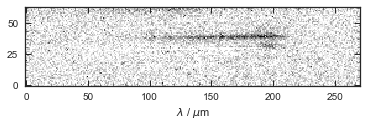

In [20]:
## Plot it
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(co.grism.data['SCI']-co.contam-model.reshape(co.beam.sh_beam)*C, 
          interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

ax.set_xlabel(r'$\lambda$ / $\mu$m')

In [66]:
co.grism.data

OrderedDict([('SCI',
              array([[ 0.00761107, -0.01202053, -0.02635279, ..., -0.00069344,
                      -0.00315803,  0.00693096],
                     [-0.04123693, -0.07137563, -0.02302199, ...,  0.03103576,
                      -0.01431073,  0.04590869],
                     [-0.03242683, -0.01065515, -0.03682273, ...,  0.00971219,
                       0.00538749,  0.00822077],
                     ..., 
                     [-0.0150705 , -0.00874238,  0.00218525, ..., -0.0350841 ,
                       0.12599671,  0.03654602],
                     [-0.01212543, -0.01062511, -0.04579063, ...,  0.02522334,
                       0.00592661, -0.        ],
                     [-0.00570052, -0.00140859,  0.00167351, ..., -0.03020221,
                      -0.02760869, -0.0024729 ]], dtype=float32)),
             ('ERR',
              array([[  2.96101365e-02,   2.92833708e-02,   2.93512810e-02, ...,
                        3.04299295e-02,   3.00094876e-02,   3.05

In [55]:
def Extract_2D(grism_flt,direct_flt,name):
    flt = grizli.model.GrismFLT(grism_file= grism_flt, 
                            direct_file= direct_flt,
                            pad=200, ref_file=None, ref_ext=0, 
                            seg_file='../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits',
                            shrink_segimage=False)
    
    ref_cat = Table.read('../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat', format='ascii')
    sim_cat = flt.blot_catalog(ref_cat, sextractor=False)
    
    id = 39170
    
    x0 = ref_cat['x'][39169]+1
    y0 = ref_cat['y'][39169]+1

    mag =-2.5*np.log10(ref_cat['f_F850LP']) + 25
    keep = mag < 22

    flt.compute_full_model(ids=ref_cat['id'][keep],verbose=False, 
                           mags=mag[keep])

    ### Get the beams/orders
    beam = flt.object_dispersers[id]['A'] # can choose other orders if available
    beam.compute_model()
    
    ### BeamCutout object
    co = grizli.model.BeamCutout(flt, beam, conf=flt.conf)

    wv,fl = np.load('../../../fsps_models_for_fit/fsps_spec/m0.029_a4.7_dt8.78_spec.npy')
    spec = S.ArraySpectrum(wv, fl, fluxunits='flam')
    spec = spec.redshift(1.023).renorm(1., 'flam', S.ObsBandpass('wfc3,ir,f105w'))
#     spec.convert('flam')
    model = co.beam.compute_model(spectrum_1d=[spec.wave, spec.flux], in_place=False).reshape(co.beam.sh_beam)

    xspec, yspec, yerr = co.beam.optimal_extract(co.grism.data['SCI'], bin=0, ivar=co.ivar) #data
    xspecm, yspecm, yerrm = co.beam.optimal_extract(model, bin=0, ivar=co.ivar) # continuum model
    xspecc, yspecc, yerrc = co.beam.optimal_extract(co.contam, bin=0, ivar=co.ivar) # contamination model
    C = Scale_model(yspec[yspec > 0]-yspecc[yspec > 0],yerr[yspec > 0],yspecm[yspec > 0])

    
    plt.clf
    plt.figure(figsize=[12,8])
    plt.errorbar(xspec/1.e4, yspec-yspecc, yerr, linestyle='None', marker='o', markersize=3, color='black', 
                 alpha=0.5, label='clean spec(id=%d)' %(co.beam.id))

    plt.plot(xspecm/1.e4, yspecm*C, color='red', linewidth=2, alpha=0.8, 
             label=r'model')

    plt.legend(fontsize=10)
    
    plt.savefig('../plots/%s.png' % name)
    plt.close
    
    plt.figure(figsize=[12,4])
    plt.imshow(co.grism.data['SCI']-co.contam-model*C, 
              interpolation='Nearest', vmin=-0.02, vmax=0.2, 
               cmap='gray_r', origin='lower')

    plt.savefig('../plots/%s_2d.png' % name)
    plt.close
    
    np.save('../data/%s_2d_data' % name, co.grism.data['SCI'])
    np.save('../data/%s_2d_error'% name, co.grism.data['ERR'])
    np.save('../data/%s_2d_contam'% name, co.contam)
    np.save('../data/%s_2d_model'% name, model*C)
    
    return

../../../Clear_data/flt_files/icxt23q2q_flt.fits / blot segmentation ../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
ID 1 not found in segmentation image
ID 68 not found in segmentation image
ID 102 not found in segmentation image
ID 104 not found in segmentation image
ID 160 not found in segmentation image
ID 194 not found in segmentation image
ID 234 not found in segmentation image
ID 236 not found in segmentation image
ID 330 not found in segmentation image
ID 340 not found in segmentation image
ID 357 not found in segmentation image
ID 405 not found in segmentation image
ID 450 not found in segmentation image
ID 456 not found in segmentation image
ID 490 not found in segmentation image
ID 543 not found in segmentation image
ID 599 not found in segmentation image
ID 601 not found in segmentation image
ID 647 not found in segmentation image
ID 721 not found in s

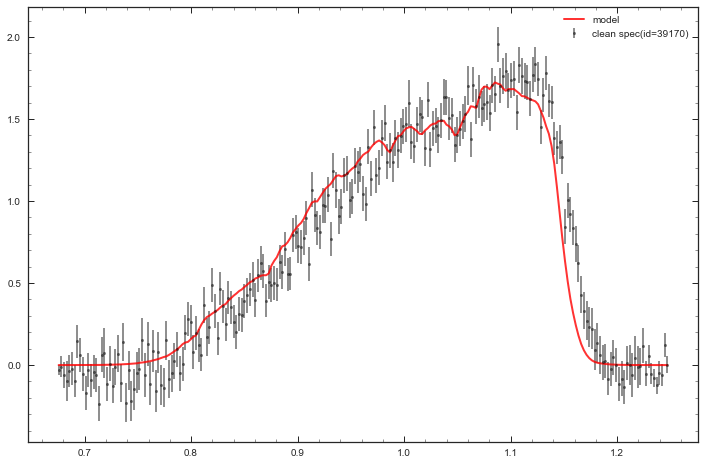

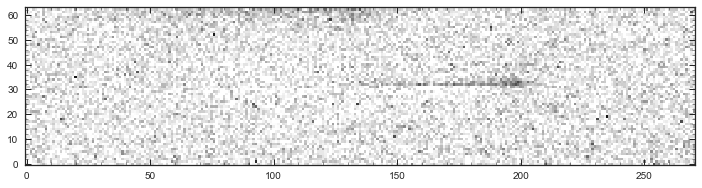

In [56]:
Extract_2D('../../../Clear_data/flt_files/icxt23q1q_flt.fits',
           '../../../Clear_data/flt_files/icxt23q2q_flt.fits','test')


/Users/Vince.ec/Clear_data/flt_files/icxt22ppq_flt.fits / blot segmentation ../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
ID 1 not found in segmentation image
ID 68 not found in segmentation image
ID 102 not found in segmentation image
ID 104 not found in segmentation image
ID 160 not found in segmentation image
ID 194 not found in segmentation image
ID 234 not found in segmentation image
ID 236 not found in segmentation image
ID 330 not found in segmentation image
ID 340 not found in segmentation image
ID 357 not found in segmentation image
ID 405 not found in segmentation image
ID 450 not found in segmentation image
ID 456 not found in segmentation image
ID 490 not found in segmentation image
ID 543 not found in segmentation image
ID 599 not found in segmentation image
ID 601 not found in segmentation image
ID 647 not found in segmentation image
ID 721 not fou

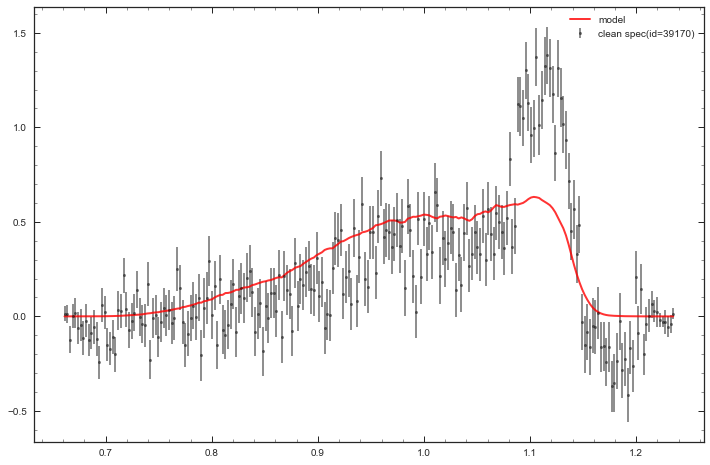

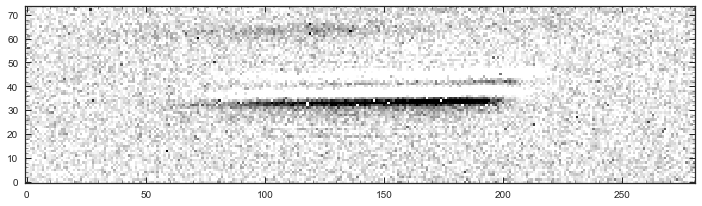

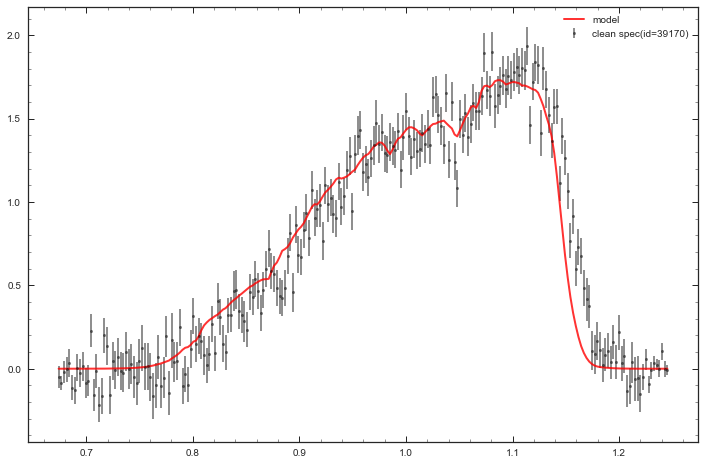

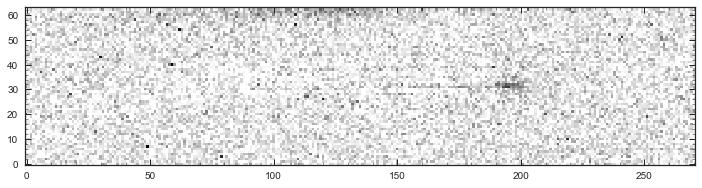

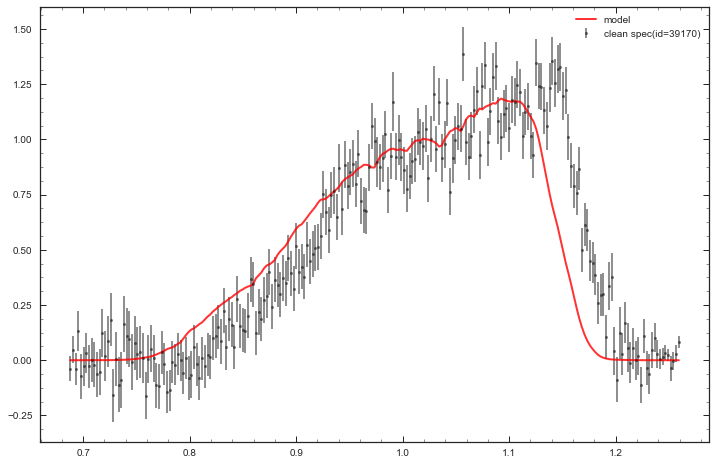

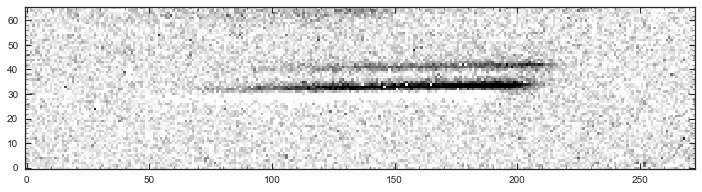

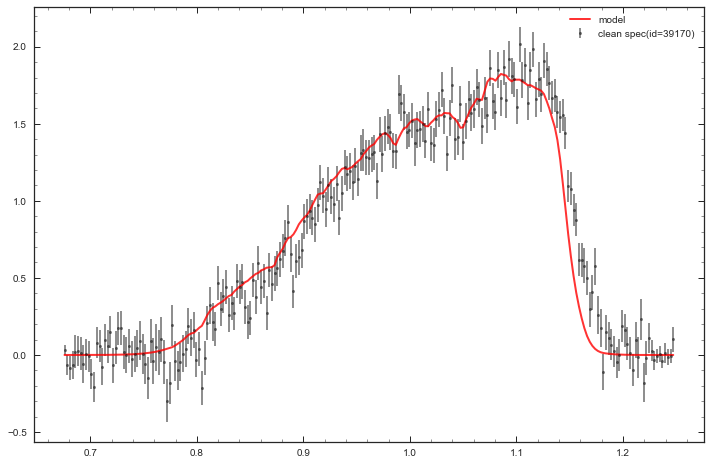

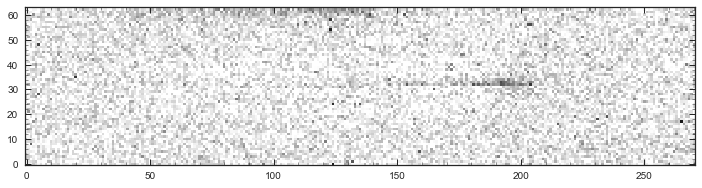

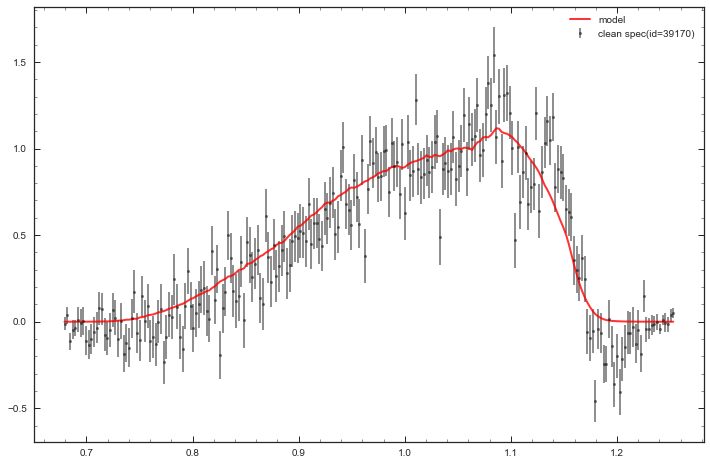

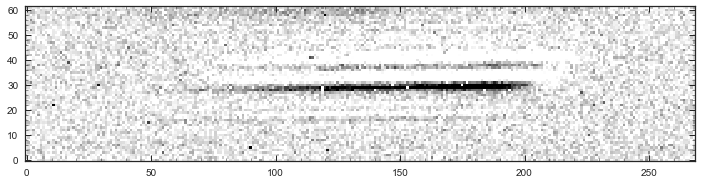

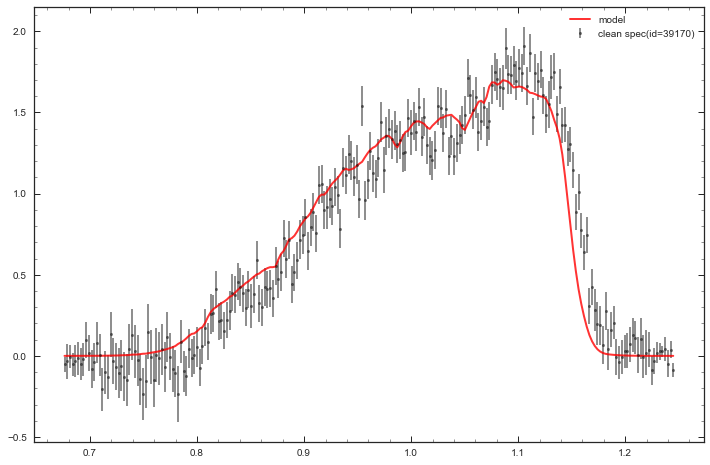

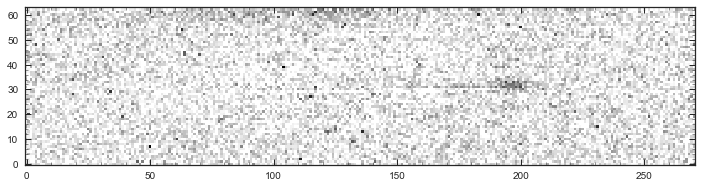

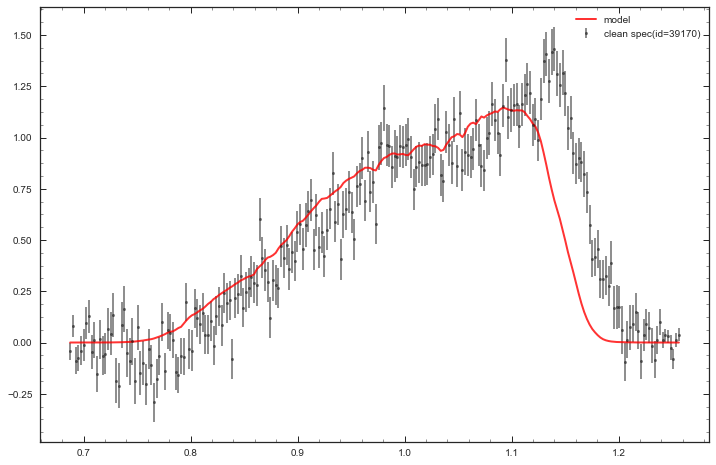

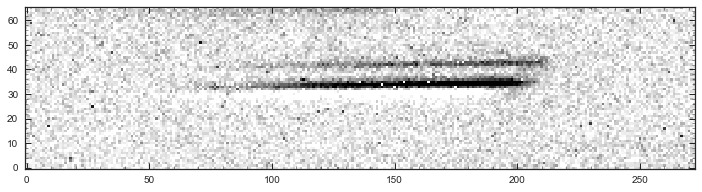

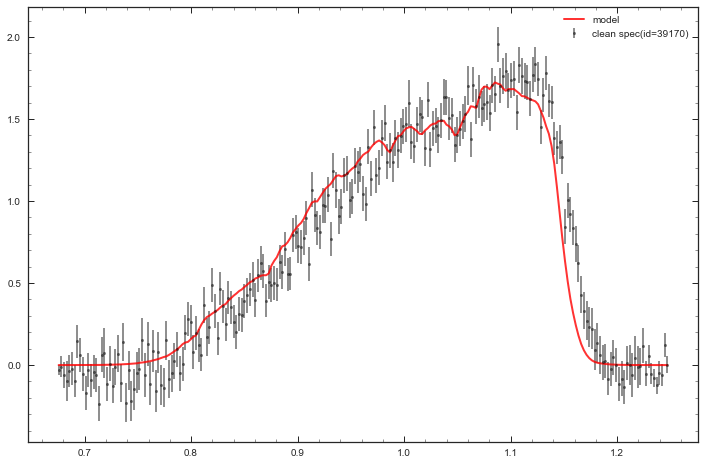

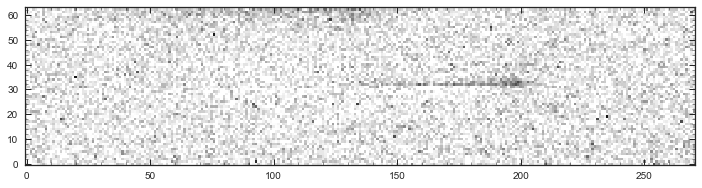

In [63]:
for i in range(len(g_speclist[12:])):
    Extract_2D(g_speclist[12:][i],g_speclist_p[6:][i/2],'test%s' % i)

In [64]:
good_spec = [3,5,7]

data_all = []
error_all =[]
model_all = []

for i in good_spec:
    dat = np.load('../data/test%s_2d_data.npy' % i)
    err = np.load('../data/test%s_2d_error.npy'% i)
    con = np.load('../data/test%s_2d_contam.npy'% i)
    mod = np.load('../data/test%s_2d_model.npy'% i)
    
    data_all.append(dat - con)
    error_all.append(err)
    model_all.append(mod)

In [65]:
data_all = np.array(data_all)
error_all = np.array(error_all)
model_all = np.array(model_all)

In [66]:
st_data = sum(data_all*(1/error_all)**2)/sum((1/error_all)**2)
st_error = 1/np.sqrt(sum((1/error_all)**2))
st_model = sum(model_all)/3

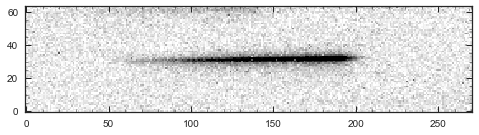

In [67]:
%matplotlib inline
plt.figure(figsize=[8,4])
plt.imshow(st_data, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')
plt.savefig('../plots/2D_data.png',bbox_inches = 'tight')

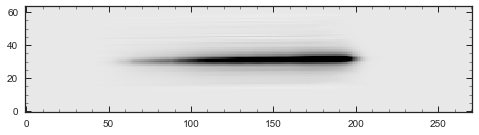

In [69]:
%matplotlib inline
plt.figure(figsize=[8,4])
plt.imshow(adjmodel*1.2, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
            cmap='gray_r',origin='lower')
plt.savefig('../plots/2D_model.png',bbox_inches = 'tight')

In [68]:
adjmodel = np.append(np.zeros([4,len(st_model)]),st_model.T[:-4], axis=0).T

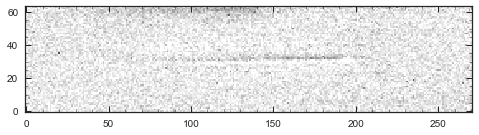

In [77]:
%matplotlib inline
plt.figure(figsize=[8,4])
plt.imshow(st_data-adjmodel*C1,interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')
plt.savefig('../plots/2D_resids.png',bbox_inches = 'tight')

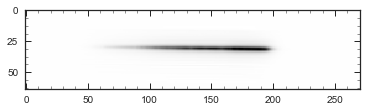

In [71]:
plt.imshow(adjmodel)

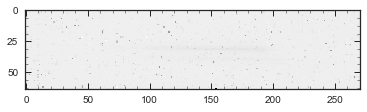

In [61]:
plt.imshow(st_error)

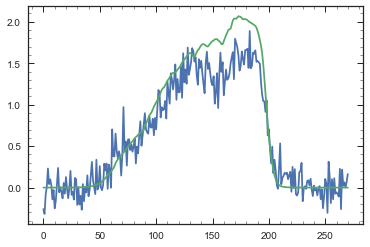

In [72]:
plt.plot(sum(st_data))
plt.plot(sum(adjmodel*1.2))


In [21]:
np.append(np.zeros([1,len(st_model)]),st_model.T[:-1], axis=0).T.shape

(64, 271)

In [17]:
print np.zeros([1,len(st_model)]).shape
print st_model.T[:-1].shape

(1, 64)
(270, 64)


In [6]:
64*271

17344

In [68]:
chi = []
for i in range(10):
    adjust_model = np.append(np.zeros([i+1,len(st_model)]),st_model.T[:-(i+1)], axis=0).T
    chi.append(np.sum(((st_data - adjust_model)/st_error)**2))

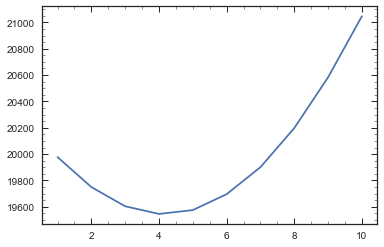

In [71]:
plt.plot(np.arange(10)+1,chi)

In [73]:
rs = st_data.shape[0]*st_data.shape[1]
C1 = Scale_model(st_data.reshape(rs),st_error.reshape(rs),adjmodel.reshape(rs))
C2 = Scale_model(sum(st_data),sum(st_error),sum(adjmodel))

In [74]:
C1

0.98386400714905431

In [75]:
C2

0.97965882623269296

In [76]:
print     np.sum(((st_data - adjmodel*C1)/st_error)**2)
print     np.sum(((st_data - adjmodel*C2)/st_error)**2)

19315.7002955
19316.5634999


In [84]:
np.save('../data/stacked_2d',st_data)
np.save('../data/stacked_error',st_error)

In [2]:
grism_file='../../../Clear_data/flt_files/icxt23pwq_flt.fits' 
direct_file='../../../Clear_data/flt_files/icxt23pyq_flt.fits'
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [3]:
Single_gal_fit_full_2d(metal, age, tau, 1.023,'../data/stacked_2d.npy', 
                       '../data/stacked_error.npy', grism_file, direct_file , '2D_test')

The following tasks in the stwcs.gui package can be run with TEAL:
     apply_headerlet          archive_headerlet          attach_headerlet     
     delete_headerlet         extract_headerlet         headerlet_summary     
    restore_headerlet             updatewcs              write_headerlet


../../../Clear_data/flt_files/icxt23pyq_flt.fits / blot segmentation ../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits[0]
The following task in the fitsblender package can be run with TEAL:
                                  blendheaders                                  
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastro

In [4]:
chifit = np.load('../chidat/2D_test_chidata.npy')

In [15]:
np.where(chifit == np.min(chifit))

(array([27]), array([42]), array([6]))

In [7]:
19500/17300.

1.1271676300578035

In [9]:
24342/17300.

1.4070520231213872

In [16]:
print [metal[27],age[42],tau[6]]

[0.028999999999999998, 4.6999999999999993, 8.78]


In [43]:
def Analyze_2D(chifits, specz, metal, age, tau, age_conv='../data/light_weight_scaling.npy'):
    ####### Get maximum age
    max_age = Oldest_galaxy(specz)

    ####### Read in file
    chi = np.load(chifits).T

    chi[:, len(age[age <= max_age]):, :] = 1E1

    ####### Get scaling factor for tau reshaping
    ultau = np.append(0, np.power(10, np.array(tau)[1:] - 9))

    convtable = np.load(age_conv)

    overhead = np.zeros([len(tau),metal.size]).astype(int)
    for i in range(len(tau)):
        for ii in range(metal.size):
            amt=[]
            for iii in range(age.size):
                if age[iii] > convtable.T[i].T[ii][-1]:
                    amt.append(1)
            overhead[i][ii] = sum(amt)

    ######## Reshape likelihood to get average age instead of age when marginalized
    newchi = np.zeros(chi.shape)

    for i in range(len(chi)):
        frame = np.zeros([metal.size, age.size])
        for ii in range(metal.size):
            dist = interp1d(convtable.T[i].T[ii], chi[i].T[ii])(age[:-overhead[i][ii]])
            frame[ii] = np.append(dist, np.repeat(1E15, overhead[i][ii]))
        newchi[i] = frame.T

    chi = newchi.T    
    
    ####### Heirarchy is metallicity_-> age -> tau
    ####### Change chi to probabilites using sympy
    ####### for its arbitrary precission, must be done in loop
    prob = []
    for i in range(len(metal)):
        preprob1 = []
        for ii in range(len(age)):
            preprob2 = []
            for iii in range(len(tau)):
                preprob2.append(sp.N(sp.exp(-chi[i][ii][iii] / 2)))
            preprob1.append(preprob2)
        prob.append(preprob1)

    ######## Marginalize over all tau
    ######## End up with age vs metallicity matricies
    ######## use unlogged tau
    ultau = np.append(0, np.power(10, np.array(tau[1:]) - 9))
    M = []
    for i in range(len(metal)):
        A = []
        for ii in range(len(age)):
            T = []
            for iii in range(len(tau) - 1):
                T.append(sp.N((ultau[iii + 1] - ultau[iii]) * (prob[i][ii][iii] + prob[i][ii][iii + 1]) / 2))
            A.append(sp.mpmath.fsum(T))
        M.append(A)

    ######## Integrate over metallicity to get age prob
    ######## Then again over age to find normalizing coefficient
    preC1 = []
    for i in range(len(metal)):
        preC2 = []
        for ii in range(len(age) - 1):
            preC2.append(sp.N((age[ii + 1] - age[ii]) * (M[i][ii] + M[i][ii + 1]) / 2))
        preC1.append(sp.mpmath.fsum(preC2))

    preC3 = []
    for i in range(len(metal) - 1):
        preC3.append(sp.N((metal[i + 1] - metal[i]) * (preC1[i] + preC1[i + 1]) / 2))

    C = sp.mpmath.fsum(preC3)

    ######## Create normal prob grid
    P = []
    for i in range(len(metal)):
        preP = []
        for ii in range(len(age)):
            preP.append(M[i][ii] / C)
        P.append(np.array(preP).astype(np.float128))

    return P
        

In [44]:
P = Analyze_2D('../chidat/2D_test_chidata.npy',1.023, metal,age,tau)

In [45]:
M,A=np.meshgrid(metal,age)

In [51]:
P

[array([ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,
         0.0,  0.0,  0.0,  23.333409,  25.193278,  26.642283,  24.946022,
         19.460797,  15.719132,  17.507897,  9.2575866,  17.700606,
         8.4430193,  8.9049927,  9.0354354,  9.0354354,  3.2145681e-242,
         9.0550055,  0.0,  8.0702822,  8.0702822,  8.4429001,  8.4429001,
         8.4429001,  0.0,  9.1028529,  9.1028529,  0.0,  9.0013218,
         9.0013218,  0.0,  8.7697269,  8.7697269,  8.7428213,  8.7428213,
         8.893138,  17.677577,  13.184339,  4.4026488,  4.4026488,  0.0,
         0.0,  0.0,  0.0,  0.0], dtype=float128),
 array([ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,
         0.0,  0.0,  0.0,  23.333409,  25.193278,  17.349555,  24.946022,
         10.337757,  15.719132,  9.9196827,  9.2575866,  8.4430193,
         1.2862573e-114,  8.9049927,  9.0354354,  9.0354354,  9.0550055,
         9.0550055,  0.0,  8.0702822,  8.0702822,  8.4429001,  8.4429001,
         

([<matplotlib.axis.XTick at 0x11ae5c7d0>,
 <a list of 6 Text xticklabel objects>)

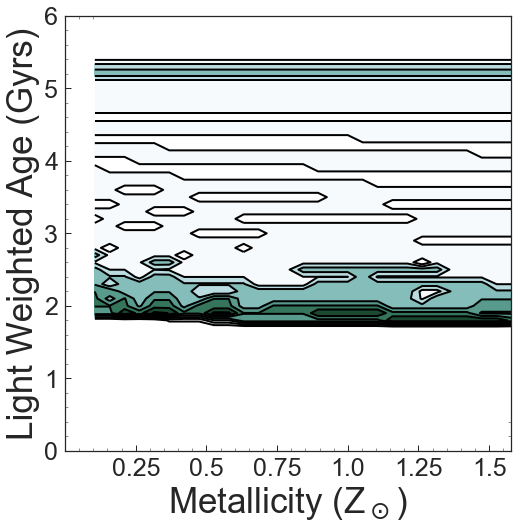

In [46]:
%matplotlib inline
plt.figure(figsize=[8,8])
plt.contour(M,A,np.array(P).T,colors='k',linewidths=2)
plt.contourf(M,A,np.array(P).T,cmap=cmap)
plt.axis([0,0.03,0,6])
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Light Weighted Age (Gyrs)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])


In [54]:
np.where(np.array(P) == np.max(P))

(array([4]), array([14]))

In [53]:
np.max(P)

36.176609670056443235